In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')   
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


AttributeError: module 'yfinance' has no attribute 'pdr_override'

In [37]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

ticker_dji = '^DJI'
ticker_kospi = '^KS11'
start_date = '2000-01-04'

dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)
kospi_data = yf.download(ticker_kospi, start=start_date, auto_adjust=True, progress=False)


In [30]:
print(dow_data.columns)
print(dow_data.index.names)
print(dow_data.shape) #[0] row(). [1] columns
print(type(dow_data))

close_data = dow_data[['Close']] #series ['Close'] or multiindex[['Close']]
print(close_data.head())

df = close_data.dropna()
print(df.head())
print(df.shape) #[0] row(). [1] columns

MultiIndex([( 'Close', '^DJI'),
            (  'High', '^DJI'),
            (   'Low', '^DJI'),
            (  'Open', '^DJI'),
            ('Volume', '^DJI')],
           names=['Price', 'Ticker'])
['Date']
(6501, 5)
<class 'pandas.core.frame.DataFrame'>
Price              Close
Ticker              ^DJI
Date                    
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570
2000-01-10  11572.200195
Price              Close
Ticker              ^DJI
Date                    
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570
2000-01-10  11572.200195
(6501, 1)


In [31]:
close_data = dow_data['Close'] #series ['Close'] or multiindex[['Close']]
print(close_data.head())

Ticker              ^DJI
Date                    
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570
2000-01-10  11572.200195


In [32]:
df = dow_data[['Close','High']].reset_index()
print(df.head())
df = dow_data['Close'].reset_index()
print(df.head())
df = dow_data[['Close', 'High']]
print(df.head())

Price        Date         Close          High
Ticker                     ^DJI          ^DJI
0      2000-01-04  10997.929688  11350.059570
1      2000-01-05  11122.650391  11215.099609
2      2000-01-06  11253.259766  11313.450195
3      2000-01-07  11522.559570  11528.139648
4      2000-01-10  11572.200195  11638.280273
Ticker       Date          ^DJI
0      2000-01-04  10997.929688
1      2000-01-05  11122.650391
2      2000-01-06  11253.259766
3      2000-01-07  11522.559570
4      2000-01-10  11572.200195
Price              Close          High
Ticker              ^DJI          ^DJI
Date                                  
2000-01-04  10997.929688  11350.059570
2000-01-05  11122.650391  11215.099609
2000-01-06  11253.259766  11313.450195
2000-01-07  11522.559570  11528.139648
2000-01-10  11572.200195  11638.280273


In [34]:
dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)

dow_data.columns = dow_data.columns.droplevel(0)  # (0) 1st, (1) 2nd
print(dow_data.head())

Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2000-01-04  10997.929688  11350.059570  10986.450195  11349.750000  178420000
2000-01-05  11122.650391  11215.099609  10938.669922  10989.370117  203190000
2000-01-06  11253.259766  11313.450195  11098.450195  11113.370117  176550000
2000-01-07  11522.559570  11528.139648  11239.919922  11247.059570  184900000
2000-01-10  11572.200195  11638.280273  11532.480469  11532.480469  168180000


In [35]:
dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)

dow_data.columns = dow_data.columns.droplevel(1)  # (0) 1st, (1) 2nd
print(dow_data.head())

Price              Close          High           Low          Open     Volume
Date                                                                         
2000-01-04  10997.929688  11350.059570  10986.450195  11349.750000  178420000
2000-01-05  11122.650391  11215.099609  10938.669922  10989.370117  203190000
2000-01-06  11253.259766  11313.450195  11098.450195  11113.370117  176550000
2000-01-07  11522.559570  11528.139648  11239.919922  11247.059570  184900000
2000-01-10  11572.200195  11638.280273  11532.480469  11532.480469  168180000


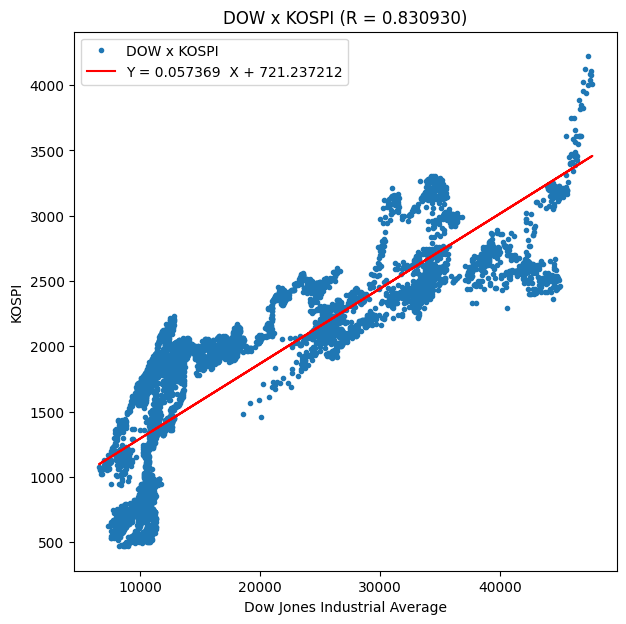

In [40]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

ticker_dji = '^DJI'
ticker_kospi = '^KS11'
start_date = '2000-01-04'

dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)
kospi_data = yf.download(ticker_kospi, start=start_date, auto_adjust=True, progress=False)

#dow_data.columns = dow_data.columns.droplevel(0)
#kospi_data.columns = kospi_data.columns.droplevel(0)
#df = pd.DataFrame({'X': dow_data['Close'], 'Y': kospi_data['Close']})

df = pd.DataFrame({'X': dow_data['Close']['^DJI'],'Y': kospi_data['Close']['^KS11'] })
df = df.bfill().ffill()

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

## 3.6.5 선형회귀 분석
잡음 noise\
선형회귀 모델 linear regression model
$$Y_i=\beta_0+\beta_1 X_i + \epsilon_i (i=1,2,\ldots, n) $$
회귀함수 regression function
$$E(Y)=\beta_0+\beta_1 X_i$$

In [41]:
regr = stats.linregress(df.X, df.Y)
print(regr)

LinregressResult(slope=np.float64(0.05736870376437927), intercept=np.float64(721.2372117331781), rvalue=np.float64(0.8309304805988907), pvalue=np.float64(0.0), stderr=np.float64(0.00046925523291398694), intercept_stderr=np.float64(10.065825074726305))


In [44]:
regr = stats.linregress(df.X, df.Y)

print("Linear Regression Result")
print(f"  Slope:     {regr.slope:.4f}")
print(f"  Intercept: {regr.intercept:.4f}")
print(f"  R-value:   {regr.rvalue:.4f}")
print(f"  P-value:   {regr.pvalue:.4e}")
print(f"  Std Err:   {regr.stderr:.4f}")


Linear Regression Result
  Slope:     0.0574
  Intercept: 721.2372
  R-value:   0.8309
  P-value:   0.0000e+00
  Std Err:   0.0005


## 3.7 상관계수에 따른 Risk 완화
상관계수 Coefficient of correlation
### 3.7.1 상관계수구하기
df.corr()


In [45]:
df.corr()

,X,Y
X,1.00000,0.83093
Y,0.83093,1.00000


### 3.7.2 시리즈로 상관계수 구하기

In [58]:
print(dow_data.columns)
dow_close = dow_data['Close', '^DJI']
kospi_close = kospi_data['Close', '^KS11']
corr = dow_close.corr(kospi_close)
print('%.4f' %corr)

MultiIndex([( 'Close', '^DJI'),
            (  'High', '^DJI'),
            (   'Low', '^DJI'),
            (  'Open', '^DJI'),
            ('Volume', '^DJI')],
           names=['Price', 'Ticker'])
0.8304


In [57]:
dow_close = dow_data.loc[:, ('Close', '^DJI')]
kospi_close = kospi_data.loc[:, ('Close', '^KS11')]
corr = dow_close.corr(kospi_close)
print('%.4f' %corr)

0.8304


### 3.7.3 결정계수
결정계수 R-squared
상관계수 R value


In [62]:
r_value=dow_close.corr(kospi_close)
print(r_value)
r_squared=r_value**2
print(r_squared)

0.8304233044330651
0.6896028645455311


### 3.7.4 회귀분석

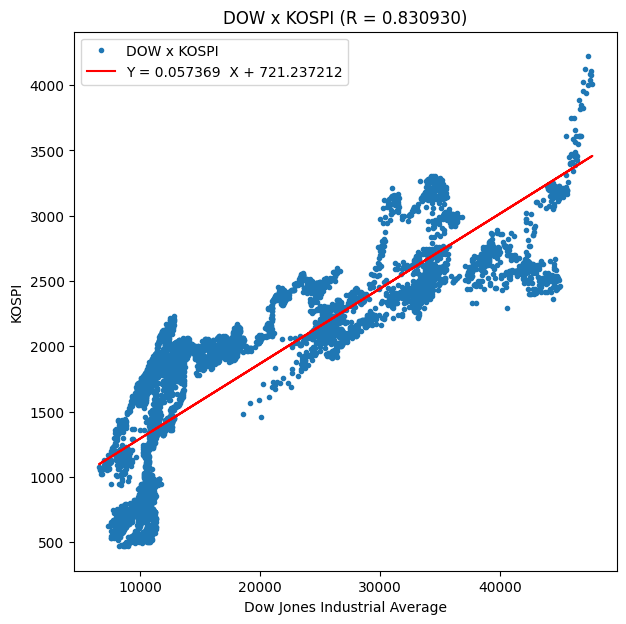

In [63]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

ticker_dji = '^DJI'
ticker_kospi = '^KS11'
start_date = '2000-01-04'

dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)
kospi_data = yf.download(ticker_kospi, start=start_date, auto_adjust=True, progress=False)

#dow_data.columns = dow_data.columns.droplevel(0)
#kospi_data.columns = kospi_data.columns.droplevel(0)
#df = pd.DataFrame({'X': dow_data['Close'], 'Y': kospi_data['Close']})

df = pd.DataFrame({'X': dow_data['Close']['^DJI'],'Y': kospi_data['Close']['^KS11'] })
df = df.bfill().ffill()

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

미국 국채에 해당하는 iShares 20 + Year Treasury Bond ETF (TLT)

### 3.7.5 리스크 완화
노벨경제학상, 해리 마코위츠 Harry Markowitz\
현대 포트폴리오 이론 modern portfolio theory, MPT\
투자에 대한 수익과 위험은 평균과 분사으로 나타낼 수 있으며, 상관관계가 낮은 자산을 대상으로 분산 투자하면 위험을 감소시킬 수 있다는 이론.\
예) 주식과 채권

In [64]:
import pandas as pd
s1=pd.Series([+10,-20,+30,-40,+50])
s2=pd.Series([+1,-2,+3,-4,+5])
s3=pd.Series([-10,+20,-30,+40,-50])
df=pd.DataFrame({"A":s1,"B":s2,"C":s3})
df



,A,B,C
0,10,1,-10
1,-20,-2,20
2,30,3,-30
3,-40,-4,40
4,50,5,-50


In [65]:
df.corr()

,A,B,C
A,1.0,1.0,-1.0
B,1.0,1.0,-1.0
C,-1.0,-1.0,1.0


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open    Volume
Ticker         005930.KS     005930.KS     005930.KS     005930.KS 005930.KS
Date                                                                        
2018-05-04  42516.726562  44155.136064  42434.806087  43417.851788  39565391
2018-05-08  43090.179688  43581.702650  42516.736232  43090.179688  23104720
2018-05-09  41697.523438  43254.012525  41697.523438  43090.171568  16128305
2018-05-10  42270.972656  42352.893146  41451.767760  42352.893146  13905263
2018-05-11  42025.199219  42762.483416  41943.278752  42598.642483  10314997


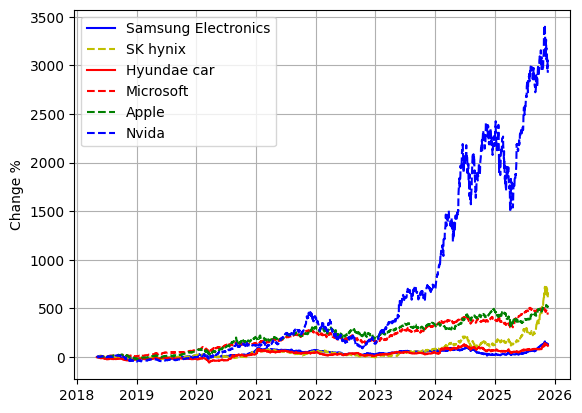

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
'''
yf.pdr_override()
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
aapl = pdr.get_data_yahoo('AAPL', start='2018-05-04')

#import yfinance as yf
# pandas_datareader는 더 이상 필요하지 않습니다.
'''
'''
# 1. Ticker 객체 생성
sec_ticker = yf.Ticker('005930.KS')
msft_ticker = yf.Ticker('MSFT')
aapl_ticker = yf.Ticker('AAPL')

# 2. .history() 메소드를 사용하여 데이터 다운로드
sec = sec_ticker.history(start='2018-05-04', end='2025-11-01')
msft = msft_ticker.history(start='2018-05-04', end='2025-11-01')
aapl = aapl_ticker.history(start='2018-05-04', end='2025-11-01')
'''
# 또는 한 줄로 다운로드
sec = yf.download('005930.KS', start='2018-05-04', end='2025-11-22',auto_adjust=True)
hynx = yf.download('000660.KS', start='2018-05-04', end='2025-11-22',auto_adjust=True)
hyundae = yf.download('005380.KS', start='2018-05-04', end='2025-11-22',auto_adjust=True)
#sec2 = yf.download('005930.KS', start='2018-05-04', end='2025-11-01',auto_adjust=True)
msft = yf.download('MSFT', start='2018-05-04', end='2025-11-22',auto_adjust=True)
aapl = yf.download('AAPL', start='2018-05-04', end='2025-11-22',auto_adjust=True)
nvda = yf.download('NVDA', start='2018-05-04', end='2025-11-22',auto_adjust=True)


print(sec.head())
'''
print(sec.tail())
#print(sec2.head())
#print(sec2.tail())
#print(msft.head())
#print(msft.tail())
#print(aapl.head())
#print(aapl.tail())
#print(nvda.head())
#print(nvda.tail())
'''
#print(sec.index)
#print(sec.columns)
'''
import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.ylabel('Change %') 
plt.grid(True)
plt.legend(loc='best')
plt.show()

'''
import matplotlib.pyplot as plt
#dpc: daily percent change
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100-100 # 일간 변동률 누적곱 계산

hynx_dpc = (hynx['Close']-hynx['Close'].shift(1)) / hynx['Close'].shift(1) * 100
hynx_dpc.iloc[0] = 0 
hynx_dpc_cp = ((100+hynx_dpc)/100).cumprod()*100-100 

hyundae_dpc = (hyundae['Close']-hyundae['Close'].shift(1)) / hyundae['Close'].shift(1) * 100
hyundae_dpc.iloc[0] = 0 
hyundae_dpc_cp = ((100+hyundae_dpc)/100).cumprod()*100-100 

msft_dpc = (msft['Close']-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cp = ((100+msft_dpc)/100).cumprod()*100-100 

aapl_dpc = (aapl['Close']-aapl['Close'].shift(1)) / aapl['Close'].shift(1) * 100
aapl_dpc.iloc[0] = 0
aapl_dpc_cp = ((100+aapl_dpc)/100).cumprod()*100-100 

nvda_dpc = (nvda['Close']-nvda['Close'].shift(1)) / nvda['Close'].shift(1) * 100
nvda_dpc.iloc[0] = 0
nvda_dpc_cp = ((100+nvda_dpc)/100).cumprod()*100-100 

'''
# histogram close daily change rate
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()
'''

plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(hynx.index, hynx_dpc_cp, 'y--', label='SK hynix')
plt.plot(hyundae.index, hyundae_dpc_cp, 'r-', label='Hyundae car')
plt.plot(msft.index, msft_dpc_cp, 'r--', label='Microsoft')
plt.plot(aapl.index, aapl_dpc_cp, 'g--', label='Apple')
plt.plot(nvda.index, nvda_dpc_cp, 'b--', label='Nvida')
plt.ylabel('Change %') 
plt.grid(True)
plt.legend(loc='best')
plt.show()



In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

ticker = '^KS11'
start_date = '1990-01-04'
data = yf.download(ticker, start=start_date, auto_adjust=True) # data 변수에 KOSPI 데이터 저장

window = 252
peak = data['Close'].rolling(window, min_periods=1).max()
drawdown = data['Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()
'''
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1) 
plt.plot(data.index, data['Close'], label='KOSPI', color='green') 
plt.title(f'{ticker} Price and Drawdown Analysis (Window={window})')
plt.grid(True)
plt.legend()
plt.ylabel('Price (Points)')

plt.subplot(2, 1, 2) 
plt.plot(drawdown.index, drawdown.values, color='blue', label=f'{ticker} DD') 
plt.plot(max_dd.index, max_dd.values, color='red', label=f'{ticker} Rolling MDD', linestyle='--') 

plt.axhline(0, color='gray', linestyle='-', linewidth=0.5) # 0% 선
plt.grid(True)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')

plt.tight_layout()
plt.show()

'''

#mdd_date = max_dd.idxmin() - Series일 경우, 사용
#mdd_value = max_dd[mdd_date]

# max_dd가 DataFrame일 경우 Series로 변환
# yfinance를 사용했다면 컬럼 이름은 Ticker 이름일 가능성이 높습니다.
max_dd_series = max_dd['^KS11'] 

# 1. MDD 값이 발생한 날짜(인덱스)를 찾습니다.
mdd_date = max_dd_series.idxmin() 

# 2. 해당 날짜의 MDD 값을 정확히 가져옵니다.
# Series는 날짜 인덱스로 바로 접근 가능합니다.
mdd_value = max_dd_series[mdd_date] 

print(f"**MDD 기록 날짜 (저점):** {mdd_date.strftime('%Y-%m-%d')}")
print(f"**MDD 값:** {mdd_value*100:.2f}%")



[*********************100%***********************]  1 of 1 completed

**MDD 기록 날짜 (저점):** 1998-06-16
**MDD 값:** -64.66%


[*********************100%***********************]  2 of 2 completed

Index(['^DJI', '^KS11'], dtype='object', name='Ticker')
['Date']
(6176, 2)
<class 'pandas.core.frame.DataFrame'>
Ticker            ^DJI       ^KS11
Date                              
2000-01-04  100.000000  100.000000
2000-01-05  101.134038   93.132456
2000-01-06  102.321619   90.722725
2000-01-07  104.770260   89.576408
2000-01-10  105.221624   93.220271


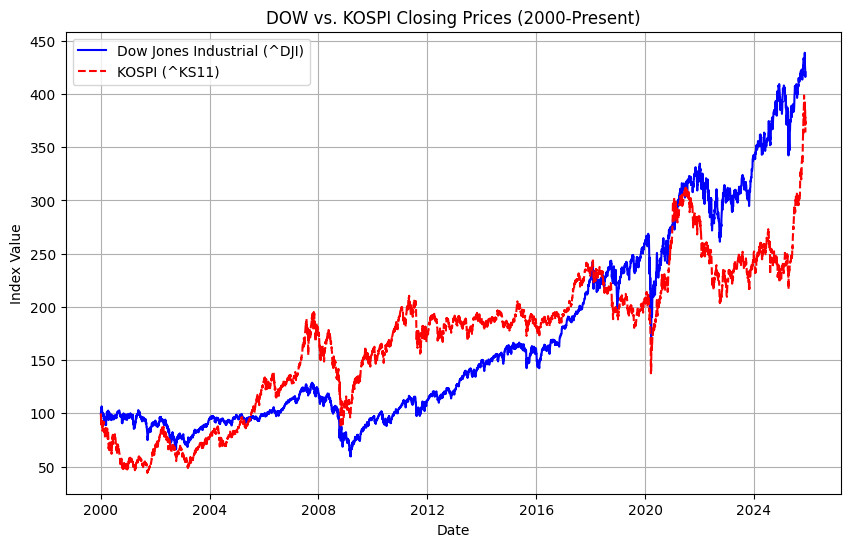

In [4]:
'''
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
 
dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()
'''

'''
import pandas as pd
import yfinance as yf

start_date = '2000-01-04'

# 1. 데이터 다운로드 (MultiIndex 생성을 위해 auto_adjust=False 유지)
# Ticker가 여러 개일 때 MultiIndex Columns가 생성됩니다.
tickers = ['^DJI', '^KS11']
data = yf.download(tickers, start=start_date, auto_adjust=False)

# 2. DataFrame 변수 이름 변경 (df로 가정)
# data 변수가 MultiIndex Columns를 가진 DataFrame입니다.
df = data 

# 3. MultiIndex Columns 이름 확인
print(df.columns.names)

# 4. (선택 사항) Close 가격만 추출하여 비교 (MultiIndex 접근 방식)
# DOW와 KOSPI의 종가만 추출
df_close = df['Close']
print(df_close.head())
'''
'''
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

ticker = ['^DJI','^KS11']
start_date = '2000-01-04'
data = yf.download(ticker, start=start_date, auto_adjust=True) # data 변수에 KOSPI 데이터 저장

close_data = data['Close']
df = close_data.dropna()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['^DJI'], label='Dow Jones Industrial (^DJI)', color='blue' )
plt.plot(df.index, df['^KS11'], label='KOSPI (^KS11)', color='red', linestyle='--' )
plt.title('DOW vs. KOSPI Closing Prices (2000-Present)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend(loc='best')
plt.show()
'''

'''
plt.figure(figsize=(7, 7))
plt.scatter(df['^DJI'], df['^KS11'], marker='.', alpha=0.6)
plt.title('Correlation between DOW and KOSPI Closing Prices')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
'''

'''
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

ticker = ['^DJI','^KS11']
start_date = '2000-01-04'
data = yf.download(ticker, start=start_date, auto_adjust=True) # data 변수에 KOSPI 데이터 저장

close_data = data['Close']
df = close_data.dropna()

normalized_df = (df / df.iloc[0]) * 100


#ax = normalized_df.plot(figsize=(10, 6))
#ax.lines[0].set_color('red') # DJI를 보라색으로
#ax.lines[1].set_color('blue')  # KOSPI를 주황색으로
ax = normalized_df.plot(figsize=(10, 6),color=['red','blue'])
ax.set_title('DOW vs. KOSPI Cumulative Returns (Base: 2000-01-04 = 100)')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Index Value (Index = 100)')
ax.grid(True)
ax.legend(loc='best')
plt.show()



normalized_df.plot(ax=plt.gca()) 
plt.title('DOW vs. KOSPI Cumulative Returns (Base: 2000-01-04 = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value (Index = 100)')
plt.grid(True)
plt.legend(loc='best')
plt.show()
'''

'''
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

ticker_dji = '^DJI'
ticker_kospi = '^KS11'
start_date = '2000-01-04'

dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)
kospi_data = yf.download(ticker_kospi, start=start_date, auto_adjust=True, progress=False)

#print(dow_data.columns)
#print(dow_data.index.names)
#print(dow_data.shape) #[0] row(). [1] columns
#print(type(dow_data))

#close_data = dow_data[['Close']] #series ['Close'] or multiindex[['Close']]
#print(close_data.head())
#df = close_data.dropna()
#print(df.head())
#print(df.shape) #[0] row(). [1] columns

#df = dow_data[['Close','High']].reset_index()
#print(df.head())
#df = dow_data['Close'].reset_index()
#print(df.head())
#dow_data.columns = dow_data.columns.droplevel(1)  # (0) 1st, (1) 2nd
#print(dow_data.head())

df = dow_data[['Close', 'High']]
print(df.head())

plt.plot(df.index, df[['Close']], 'r-', label='Dow Jones Industrial (^DJI)')
plt.plot(df.index, df[['High']], 'b-', label='Dow Jones Industrial (^DJI)')
plt.grid(True)
plt.legend(loc='best')
plt.show()
'''

'''
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

ticker = ['^DJI','^KS11']
start_date = '2000-01-04'
data = yf.download(ticker, start=start_date, auto_adjust=True) 

close_data = data[['Close']] #['Close']
df = close_data.dropna()

print(df.columns)
print(df.index.names)
print(df.shape) #[0] row(). [1] columns
print(type(df))
print(df.head())
'''

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

ticker = ['^DJI','^KS11']
start_date = '2000-01-04'
data = yf.download(ticker, start=start_date, auto_adjust=True) # data 변수에 KOSPI 데이터 저장

close_data = data['Close'] #close level은 없어진다.
df = close_data.dropna()
normalized_df = (df / df.iloc[0]) * 100

print(normalized_df.columns)
print(normalized_df.index.names)
print(normalized_df.shape) #[0] row(). [1] columns
print(type(normalized_df))
print(normalized_df.head())

'''
plt.figure(figsize=(7, 7))
plt.scatter(df['^DJI'], df['^KS11'], marker='.', alpha=0.5)
plt.title('Correlation between DOW and KOSPI Closing Prices')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
'''


plt.figure(figsize=(10, 6))
plt.plot(normalized_df.index, normalized_df['^DJI'], label='Dow Jones Industrial (^DJI)', color='blue' )
plt.plot(normalized_df.index, normalized_df['^KS11'], label='KOSPI (^KS11)', color='red', linestyle='--' )
plt.title('DOW vs. KOSPI Closing Prices (2000-Present)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.legend(loc='best')
plt.show()





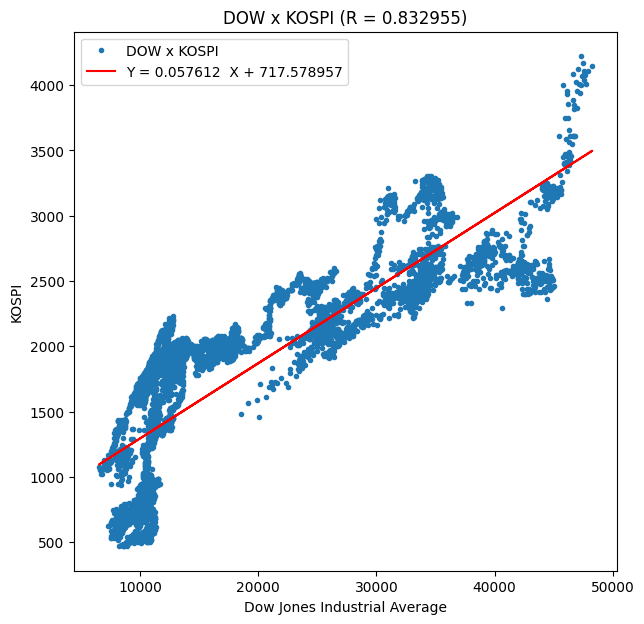

In [5]:
'''
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')   
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()
'''
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

ticker_dji = '^DJI'
ticker_kospi = '^KS11'
start_date = '2000-01-04'

dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)
kospi_data = yf.download(ticker_kospi, start=start_date, auto_adjust=True, progress=False)

#dow_data.columns = dow_data.columns.droplevel(0)
#kospi_data.columns = kospi_data.columns.droplevel(0)
#df = pd.DataFrame({'X': dow_data['Close'], 'Y': kospi_data['Close']})

df = pd.DataFrame({'X': dow_data['Close']['^DJI'],'Y': kospi_data['Close']['^KS11'] })
df = df.bfill().ffill()

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()
